In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Prepare Data

In [41]:
file_path = "data/baltic_sst_monthlymean.csv"
df = pd.read_csv(file_path, sep=';')

# Keep only rows with numeric 'Year' and convert to int
df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]
df['Year'] = df['Year'].astype(int)


# Keep only rows with numeric 'AnnualMean' and convert to float
df = df.rename(columns={'Yr': 'AnnualMean'})
df = df[pd.to_numeric(df['AnnualMean'], errors='coerce').notnull()]
df['AnnualMean'] = df['AnnualMean'].astype(float)

# Quick check of the data
# print(df.head())
# print(df.info())


### Build Plot

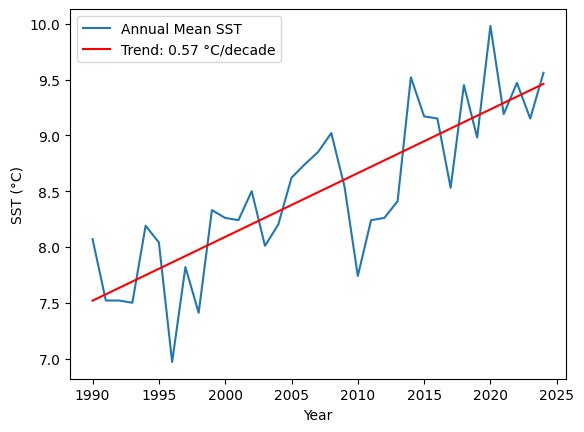

In [42]:
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['AnnualMean'])
plt.plot(df['Year'], df['AnnualMean'], label='Annual Mean SST')
plt.plot(df['Year'], intercept + slope*df['Year'], color='red', label=f'Trend: {slope*10:.2f} °C/decade')
plt.xlabel('Year')
plt.ylabel('SST (°C)')
plt.legend()
plt.show()